In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# plt.rcParams['figure.figsize'] = (10,5) 
# plt.rcParams['figure.figsize'] = (10,5.625)   # 16:9
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# plt.rcParams['figure.figsize'] = (10*2,6.180*2)    #golden ratio

In [2]:
data = pd.read_feather("/Users/weilu/Research/server/mar_2018/sixth/rg_0.15_lipid_1.0_mem_1_go_0.8/rerun_7_24_Mar_173616.feather")

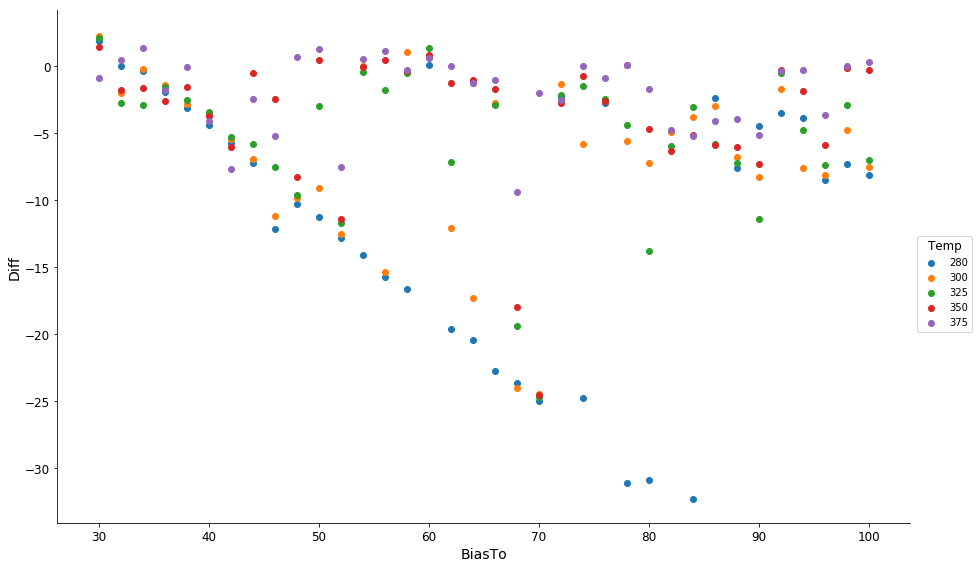

In [3]:
# dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
dic = {"T0":280, "T1":300, "T2":325, "T3":350, "T4":375, "T5":400, "T6":450, "T7":500, "T8":550, "T9":600, "T10":650, "T11":700}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

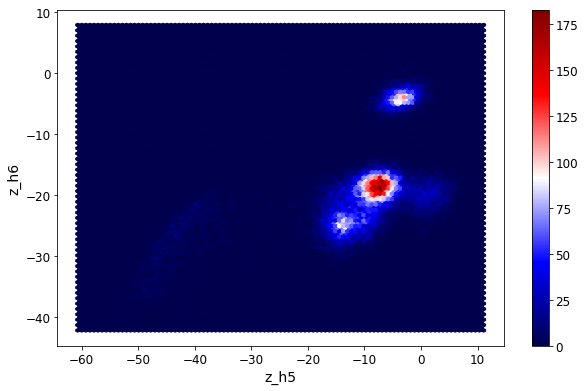

In [16]:
a.query("Temp == 300 and DisReal > 60 and DisReal < 90").plot.hexbin("z_h5", "z_h6", cmap="seismic", sharex=False)

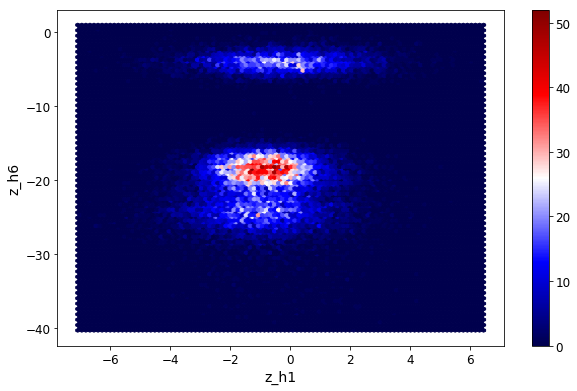

In [9]:
a.query("Temp == 280 and DisReal > 60 and DisReal < 90").plot.hexbin("z_h1", "z_h6", cmap="seismic", sharex=False)

In [17]:
a.query("Temp == 300 and DisReal > 60 and DisReal < 90 and z_h3 > -10 and z_h6 > -10").groupby(["BiasTo", "Run"])["DisReal"].describe()

count       mean       std        min        25%        50%  \
BiasTo Run                                                                 
100.0  3       8.0  82.887365  3.222597  78.260932  80.934940  82.823981   
80.0   11      2.0  62.733651  1.233299  61.861577  62.297614  62.733651   
84.0   0    1810.0  81.573071  4.397721  63.619471  78.594269  81.795106   
86.0   3     882.0  82.822474  4.052563  65.034273  79.896663  83.165387   
       10    951.0  82.964238  4.060973  68.633851  80.160615  83.347635   
90.0   3     335.0  84.887041  3.384858  73.144691  82.768863  85.425379   
94.0   2      53.0  86.122329  2.146912  81.724445  84.209229  86.291091   

                  75%        max  
BiasTo Run                        
100.0  3    84.745920  87.890796  
80.0   11   63.169688  63.605725  
84.0   0    84.909964  89.995285  
86.0   3    85.977443  89.910772  
       10   86.014547  89.989719  
90.0   3    87.647414  89.927050  
94.0   2    87.938122  89.985835

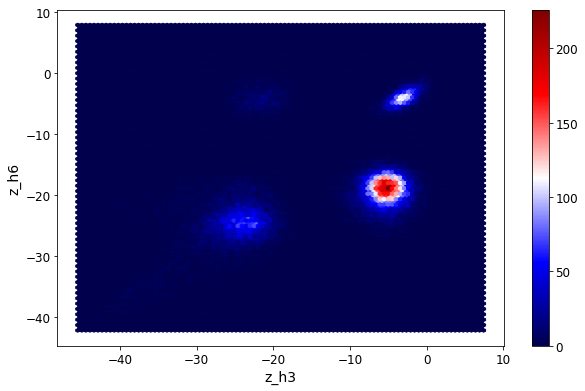

In [7]:
a.query("Temp == 300 and DisReal > 60 and DisReal < 90").plot.hexbin("z_h3", "z_h6", cmap="seismic", sharex=False)

In [143]:
data = pd.read_feather("/Users/weilu/Research/server/mar_2018/eighth/force_0.03_rg_0.15_lipid_1.0_mem_1_go_0.8/rerun_3_30_Mar_135549.feather")

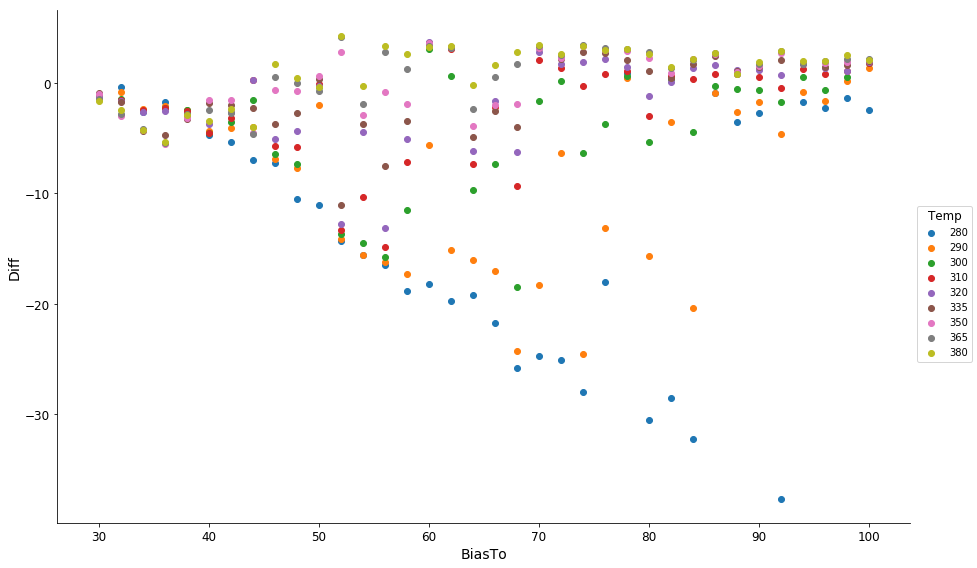

In [144]:
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}

a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

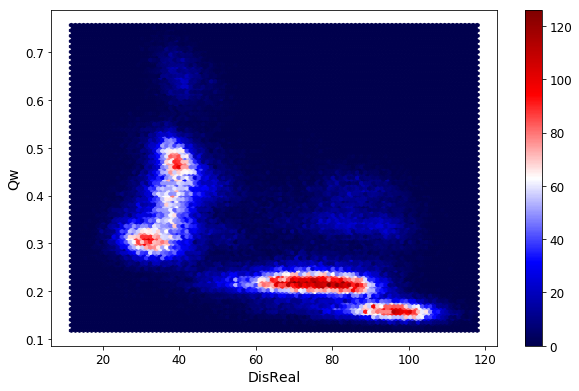

In [145]:
a.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

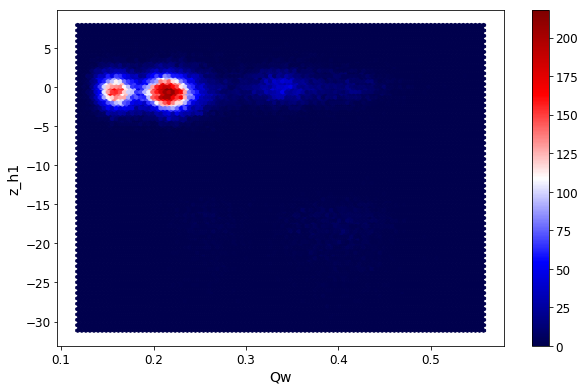

In [151]:
a.query("Temp == 300 and DisReal > 60").plot.hexbin("Qw", "z_h1", cmap="seismic", sharex=False)

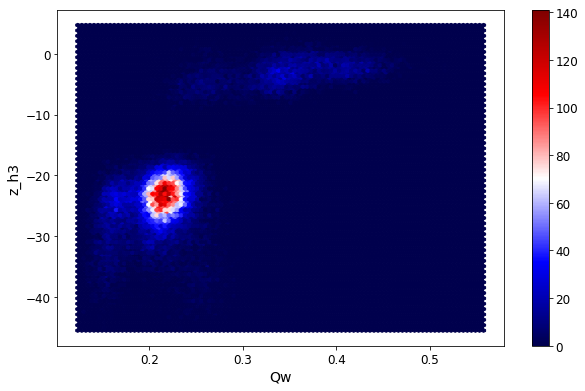

In [159]:
a.query("Temp == 300 and DisReal > 60 and DisReal < 90").plot.hexbin("Qw", "z_h3", cmap="seismic", sharex=False)

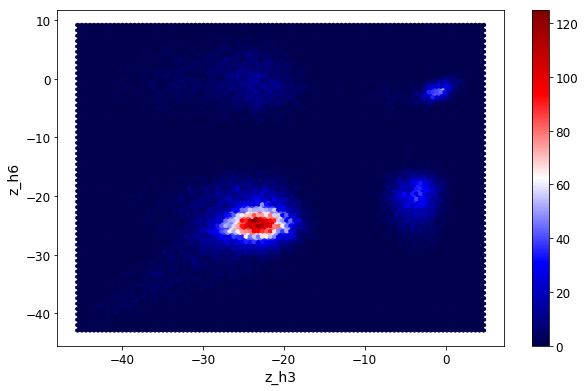

In [161]:
a.query("Temp == 300 and DisReal > 60 and DisReal < 90").plot.hexbin("z_h3", "z_h6", cmap="seismic", sharex=False)

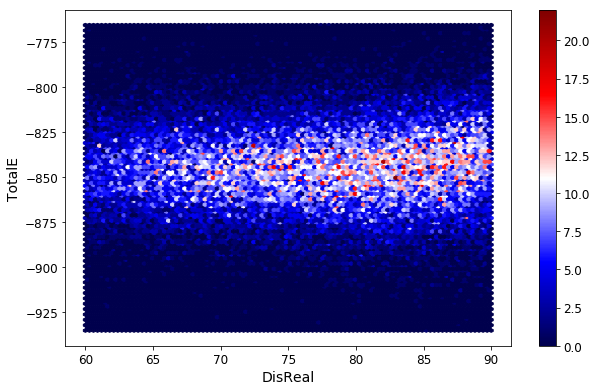

In [153]:
a.query("Temp == 300 and DisReal > 60 and DisReal < 90").plot.hexbin("DisReal", "TotalE", cmap="seismic", sharex=False)

In [139]:
b = a.query("BiasTo == '92.0'").groupby(["Run", "Temp"])["Step"].count().reset_index()
c = b.pivot(index="Run", columns="Temp", values="Step").reset_index()
c

Temp,Run,280,290,300,310,320,335,350,365,380,410,440,470
0,0,NaN,12.0,20.0,30.0,70.0,120.0,294.0,387.0,477.0,435.0,407.0,248.0
1,1,NaN,NaN,30.0,130.0,234.0,288.0,256.0,269.0,221.0,173.0,445.0,454.0
2,2,70.0,766.0,798.0,524.0,242.0,46.0,28.0,12.0,14.0,NaN,NaN,NaN
3,3,32.0,347.0,625.0,682.0,484.0,244.0,68.0,14.0,4.0,NaN,NaN,NaN
4,4,106.0,1083.0,657.0,390.0,190.0,52.0,20.0,2.0,NaN,NaN,NaN,NaN
5,5,NaN,10.0,54.0,94.0,174.0,262.0,316.0,255.0,231.0,492.0,270.0,342.0
6,6,NaN,4.0,38.0,90.0,202.0,377.0,299.0,267.0,313.0,289.0,271.0,350.0
7,7,NaN,14.0,88.0,220.0,422.0,426.0,422.0,362.0,328.0,116.0,44.0,58.0
8,8,6.0,60.0,138.0,238.0,318.0,348.0,418.0,363.0,243.0,314.0,54.0,NaN
9,9,2286.0,192.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
data = pd.read_feather("/Users/weilu/Research/server/mar_2018/eighth/force_0.03_rg_0.15_lipid_1.0_mem_1_go_0.8/rerun_1_29_Mar_152326.feather")

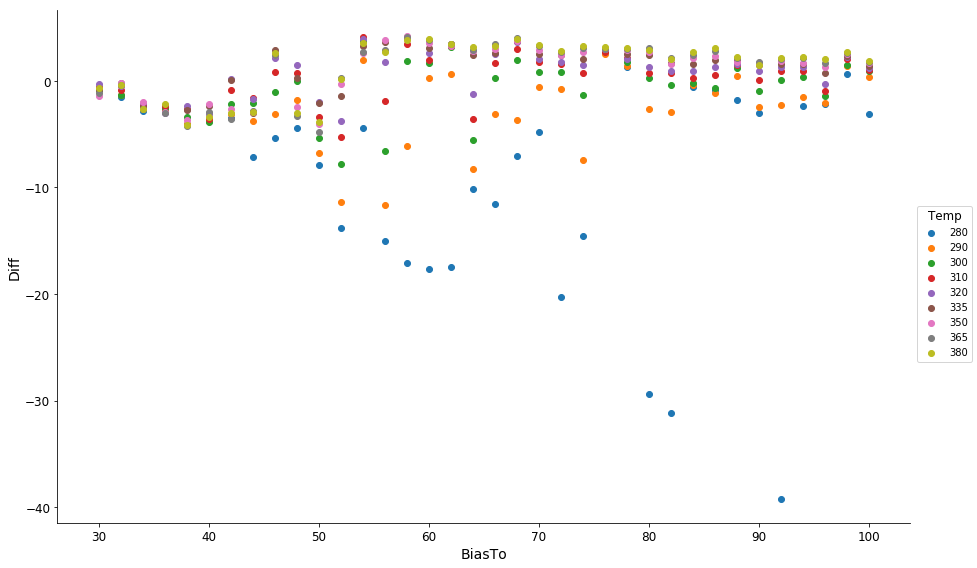

In [51]:
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}

a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

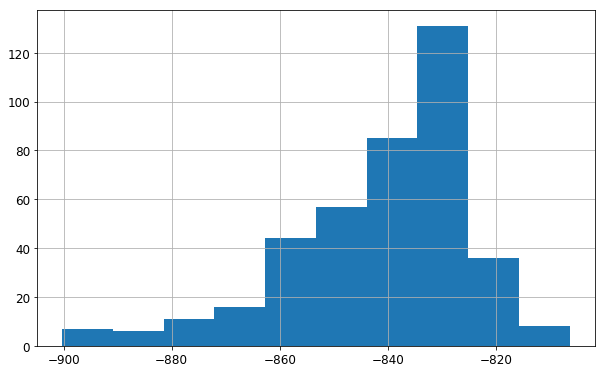

In [65]:
a.query("Temp == 300").groupby(["Run", "BiasTo"])["TotalE"].mean().hist()

In [133]:
a.query("Qw > 0.6 and Temp < 290 and TotalE < -990")

,Step,Run,Temp,Qw,Energy,DisReal,z_average,abs_z_average,z_h1,z_h2,...,Lipid8,Lipid9,Lipid10,Lipid11,Lipid12,Lipid13,Lipid14,Lipid15,TotalE,BiasTo
116510,18840000,2,280,0.651681,-973.605756,45.246300,0.148756,9.551204,1.124094,-3.992871,...,-2.703052,0.495357,-2.530598,-0.364433,-3.237033,-2.729304,-3.624784,-2.155443,-995.025333,72.0
227284,15764000,4,280,0.626426,-973.375255,37.755703,-0.555520,10.095031,-1.892137,-6.635557,...,-2.508930,-0.954845,-2.563165,0.897219,-4.293837,-2.788733,-3.992670,-0.173859,-996.479888,56.0
230944,16984000,4,280,0.649083,-962.695210,36.665209,0.190340,10.084901,0.036906,-4.740137,...,-3.524364,-0.638358,-3.080137,-0.269158,-4.396784,-3.346712,-4.098814,-0.933274,-990.305365,56.0
248084,12696000,8,280,0.707270,-968.042333,41.550612,-0.427444,9.560886,-0.254969,-4.339758,...,-3.566904,-0.273382,-2.340126,0.561161,-3.888762,-3.007515,-3.562026,-2.193626,-991.153214,80.0
250124,13376000,8,280,0.626848,-970.353394,42.423971,0.688762,9.902266,2.208203,-4.095562,...,-2.407560,0.106146,-2.555925,0.539598,-3.033658,-3.049666,-4.071697,-2.105982,-992.401839,80.0
581722,13908000,10,280,0.669184,-973.209918,38.271837,-0.434761,9.843593,-2.323659,-4.763673,...,-2.098812,-0.795175,-2.728212,0.802693,-4.033154,-2.839636,-4.007634,-0.620598,-995.952880,60.0
591538,17180000,10,280,0.657943,-973.900555,45.401346,0.198794,9.784665,0.869918,-3.586103,...,-3.153874,-0.018115,-2.549560,-0.091480,-4.349453,-3.039670,-3.698682,-2.109013,-997.325463,60.0
595762,18588000,10,280,0.722836,-984.938098,38.680115,-2.592895,9.462427,-1.003209,-7.124776,...,-3.186091,-0.207758,-1.685053,0.569298,-3.834692,-2.040544,-2.315779,-1.165337,-1001.889948,60.0
785443,11816000,7,280,0.671123,-975.361197,43.071795,-0.292515,9.599425,0.108806,-4.162789,...,-3.065892,0.740629,-2.748341,0.520972,-3.773925,-3.049437,-3.812082,-0.751952,-995.432748,82.0


In [131]:
t = a.query("Qw > 0.6 and Temp < 290 and TotalE > -900")
t.query("BiasTo == '80.0' and Run == 8")
# t.query("BiasTo == '80.0' and Run == 8").to_csv("/Users/weilu/Research/server/mar_2018/05_week/pick_structure/highE.csv")

,Step,Run,Temp,Qw,Energy,DisReal,z_average,abs_z_average,z_h1,z_h2,...,Lipid8,Lipid9,Lipid10,Lipid11,Lipid12,Lipid13,Lipid14,Lipid15,TotalE,BiasTo
242936,10980000,8,280,0.654467,-878.860398,49.891140,-1.396999,9.839042,-0.176755,-5.506808,...,-3.410691,0.228234,-2.034347,0.902379,-3.587825,-2.222975,-2.681755,-1.382419,-896.186415,80.0
244112,11372000,8,280,0.627074,-876.258264,42.276749,-0.668414,9.545861,-0.996445,-5.577059,...,-2.717436,0.265708,-3.032061,1.271781,-3.419224,-2.207691,-3.924433,-0.469034,-894.216765,80.0
244580,11528000,8,280,0.648997,-872.296441,46.707707,0.677463,10.084530,1.854297,-4.316112,...,-2.432349,0.384855,-3.023286,1.021000,-2.823856,-3.300449,-4.067547,-1.966745,-893.456708,80.0
245720,11908000,8,280,0.620989,-876.730677,52.364991,-0.943755,8.908359,0.459709,-4.683310,...,-3.558660,0.943222,-3.158271,0.218266,-3.162755,-3.111003,-3.691390,-0.734057,-899.277037,80.0
245732,11912000,8,280,0.629269,-867.915425,50.569913,-0.904425,9.439564,-0.289903,-5.297319,...,-2.971138,0.552379,-2.765597,0.389584,-2.968056,-2.587142,-3.595373,-0.743723,-888.424643,80.0
246320,12108000,8,280,0.658000,-877.487692,49.535399,-0.166682,9.623644,0.002058,-3.645375,...,-2.022419,0.056618,-2.763514,0.278087,-3.992522,-2.455636,-3.634165,-2.544244,-899.176484,80.0
246596,12200000,8,280,0.619650,-875.617268,49.325082,0.583803,9.733635,-0.565840,-4.111346,...,-2.239154,-0.783695,-2.649914,0.520036,-4.056339,-3.622810,-4.312243,-1.641223,-899.759871,80.0
248312,12772000,8,280,0.636441,-870.962623,48.407565,-0.619904,9.364386,-0.772516,-3.715080,...,-3.292048,0.601004,-3.182550,0.263535,-3.041036,-3.733192,-3.995921,-1.654031,-895.593199,80.0
251456,13820000,8,280,0.645874,-871.156933,41.342366,-0.053555,9.809104,-0.539607,-5.523925,...,-3.059462,0.246812,-2.485885,0.992471,-3.373117,-3.179055,-3.968889,-1.434680,-892.437434,80.0
251660,13888000,8,280,0.616081,-869.368815,48.593936,-1.168735,10.113190,-1.516903,-6.554004,...,-2.324320,0.079943,-2.258178,0.373690,-3.033310,-2.649539,-3.150175,-2.248606,-888.121983,80.0


In [132]:
a.query("Qw > 0.6 and Temp < 290 and TotalE < -990").groupby(["BiasTo", "Run"]).count()

,,Step,Temp,Qw,Energy,DisReal,z_average,abs_z_average,z_h1,z_h2,z_h3,...,Lipid7,Lipid8,Lipid9,Lipid10,Lipid11,Lipid12,Lipid13,Lipid14,Lipid15,TotalE
BiasTo,Run,,,,,,,,,,,,,,,,,,,,,
56.0,4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
60.0,10,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
72.0,2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
80.0,8,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
82.0,7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [124]:
a.query("Qw > 0.6").groupby("Temp")["TotalE"].describe().reset_index()

,Temp,count,mean,std,min,25%,50%,75%,max
0,280,10711.0,-940.314127,17.016894,-1001.889948,-952.032393,-940.565536,-929.124338,-869.498004
1,290,1025.0,-924.141689,18.003698,-977.000209,-937.434948,-925.158895,-911.625125,-870.731806
2,300,140.0,-909.850813,19.174489,-955.324594,-924.037974,-910.451788,-897.136057,-851.386387
3,310,20.0,-888.671825,20.996457,-929.725103,-901.586328,-892.211168,-872.477937,-846.284623
4,320,4.0,-880.289889,20.942216,-905.735070,-887.683582,-880.464204,-873.070511,-854.496080


In [123]:
a.query("Qw < 0.6").groupby("Temp")["TotalE"].describe().reset_index()

,Temp,count,mean,std,min,25%,50%,75%,max
0,280,79289.0,-899.108423,25.971777,-992.046508,-917.223791,-898.437120,-880.841987,-798.162770
1,290,88975.0,-871.067976,25.405091,-987.146328,-887.563231,-870.021002,-853.516139,-775.531914
2,300,89860.0,-847.105551,24.393808,-959.872883,-863.049942,-846.376230,-830.419552,-753.476022
3,310,89980.0,-824.338206,24.221931,-932.110735,-840.320271,-823.812008,-807.686212,-725.545875
4,320,89996.0,-801.956661,24.365900,-916.642688,-817.946837,-801.303341,-785.305072,-695.546943
5,335,90000.0,-767.837487,24.402628,-873.010053,-783.667762,-767.278149,-751.367469,-658.910049
6,350,90000.0,-733.973873,24.120450,-839.044535,-750.051279,-733.877538,-717.743245,-622.436539
7,365,90000.0,-701.070023,24.470637,-795.513722,-717.627711,-701.365330,-684.661803,-603.244369
8,380,90000.0,-668.832239,25.427055,-773.283466,-686.181286,-669.148004,-651.834381,-560.640026
9,410,90000.0,-601.004010,28.520725,-712.947718,-620.448059,-601.547587,-581.974506,-475.750013


In [97]:
tt = a.query("Qw > 0.6").groupby("Temp")["TotalE"].describe().reset_index()

In [98]:
lm_native = np.polyfit(tt.Temp, tt["mean"], 1)

In [120]:
x = np.linspace(280, 350, 100)

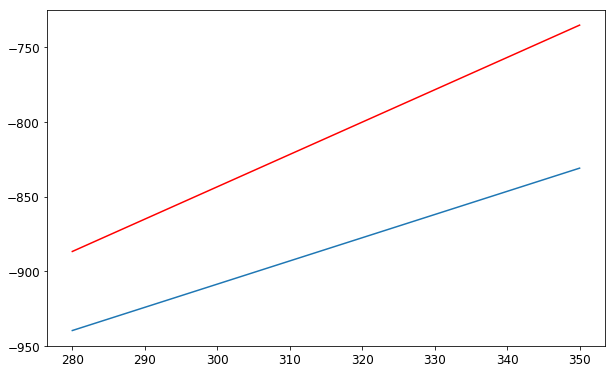

In [121]:
plt.plot(x, x*lm_native[0] + lm_native[1])
plt.plot(x, x*lm_original[0] + lm_original[1], c="red")

In [100]:
lm_native

array([    1.5551834 , -1375.20868964])

In [99]:
lm_original

array([    2.16783828, -1493.75050171])

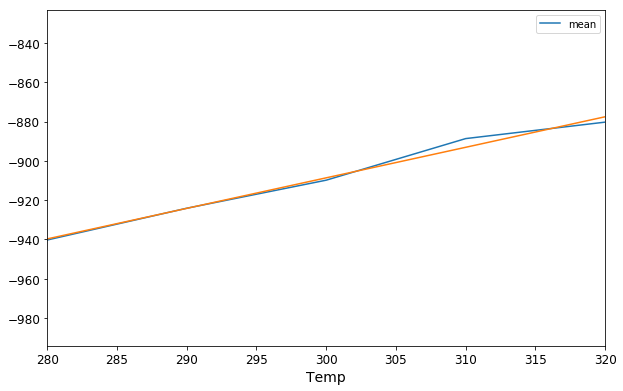

In [104]:
a.query("Qw > 0.6").groupby("Temp")["TotalE"].describe().reset_index().plot("Temp", "mean")
plt.plot(x, x*lm_native[0] + lm_native[1])

In [70]:
a.query("Temp == 280 and Qw > 0.6")["TotalE"].describe()

count    10711.000000
mean      -940.314127
std         17.016894
min      -1001.889948
25%       -952.032393
50%       -940.565536
75%       -929.124338
max       -869.498004
Name: TotalE, dtype: float64

In [69]:
a.query("Temp == 290 and Qw > 0.6")["TotalE"].describe()

count    1025.000000
mean     -924.141689
std        18.003698
min      -977.000209
25%      -937.434948
50%      -925.158895
75%      -911.625125
max      -870.731806
Name: TotalE, dtype: float64

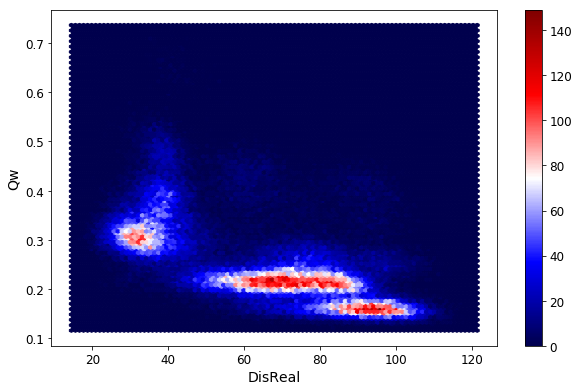

In [44]:
a.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

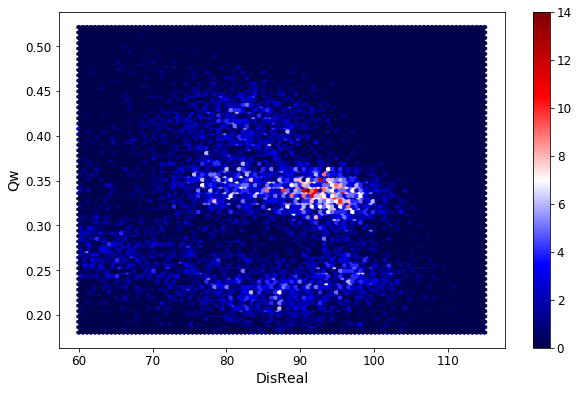

In [107]:
tt= a.query("z_h6 < -10 and Qw > 0.18 and DisReal > 60 and z_h4 > -10").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [108]:
tt= a.query("z_h6 < -10 and Qw > 0.18 and DisReal > 60 and z_h4 > -10")

In [118]:
tt= a.query("z_h6 > -10 and Qw > 0.18 and DisReal > 60 and z_h1 < -10")
tt.groupby(["BiasTo", "Run"])["TotalE"].describe().query("count > 500")

count        mean        std         min         25%         50%  \
BiasTo Run                                                                      
100.0  10   2500.0 -904.036615  19.408390 -955.907423 -917.205035 -905.041113   
56.0   2    1242.0 -837.880172  42.862831 -938.307993 -867.951560 -840.112179   
       7    1471.0 -835.484512  41.111325 -943.561499 -864.530377 -834.530855   
       11   1352.0 -843.096405  38.317129 -947.705744 -867.443829 -844.399312   
58.0   5    1715.0 -839.889422  43.058199 -935.639786 -868.929963 -845.561256   
78.0   5    2498.0 -841.703539  49.928976 -938.987280 -877.470535 -852.049236   
86.0   7    2500.0 -899.220043  25.234951 -963.860364 -916.735467 -901.416095   
96.0   2    2230.0 -887.776431  37.910163 -960.879289 -910.144982 -894.325794   
       5    2500.0 -891.759820  26.463012 -961.654822 -909.687218 -895.665074   

                   75%         max  
BiasTo Run                          
100.0  10  -891.886834 -805.717816  
56.0   2   -810.875465 -687.384838  
       7   -806.962564 -710.697695  
       11  -818.277306 -673.951751  
58.0   5   -821.715602 -649.934942  
78.0   5   -819.566321 -643.479815  
86.0   7   -884.620485 -791.519901  
96.0   2   -874.439476 -610.134680  
       5   -876.154146 -778.356987

In [119]:
# tt.query("BiasTo == '82.0'").query("Run == 2 or Run == 3").groupby(["Run","Temp"])["TotalE"].describe()

In [113]:
tt.groupby(["BiasTo", "Run"])["TotalE"].describe().query("count > 100")

count        mean        std         min         25%         50%  \
BiasTo Run                                                                      
64.0   7     585.0 -797.495197  54.635912 -925.119040 -838.594062 -802.323180   
72.0   2     406.0 -871.783097  45.953241 -946.549531 -898.497855 -880.776244   
76.0   5    1298.0 -850.935641  93.630361 -944.193458 -894.688377 -881.270179   
82.0   2    1083.0 -720.216727  97.147174 -902.804196 -804.360709 -726.365397   
       3    1097.0 -869.901106  40.015254 -934.072056 -888.822476 -875.088049   
94.0   9    2360.0 -872.839724  28.721152 -946.970221 -891.962929 -877.086823   
96.0   7     862.0 -798.772690  63.609854 -910.044359 -841.901604 -816.722398   

                   75%         max  
BiasTo Run                          
64.0   7   -755.105772 -657.244392  
72.0   2   -858.277716 -602.253977  
76.0   5   -858.920013 -496.157296  
82.0   2   -640.433983 -424.834262  
       3   -860.886282 -564.224547  
94.0   9   -857.627406 -706.733069  
96.0   7   -781.366036 -557.278000

In [110]:
tt.groupby(["BiasTo", "Run"])["DisReal"].describe().query("count > 100")

count       mean       std        min        25%        50%  \
BiasTo Run                                                                 
64.0   7     585.0  67.395008  5.139090  60.014417  63.306679  66.397782   
72.0   2     406.0  74.532009  5.287647  61.401832  70.499440  75.027002   
76.0   5    1298.0  79.729157  5.116530  61.989823  76.412812  79.900802   
82.0   2    1083.0  83.561909  6.496141  63.803403  79.062738  83.834037   
       3    1097.0  83.809071  5.092244  62.882858  80.411988  83.790532   
94.0   9    2360.0  93.169767  4.548182  75.819436  90.244224  93.406118   
96.0   7     862.0  96.118311  4.869819  77.931911  92.876898  96.208012   

                  75%         max  
BiasTo Run                         
64.0   7    70.393069   83.572295  
72.0   2    78.456929   86.198196  
76.0   5    83.016145   94.828783  
82.0   2    88.138639  102.632345  
       3    87.513750   98.499468  
94.0   9    96.247723  107.407268  
96.0   7    99.215215  115.006913

[    2.16783828 -1493.75050171]


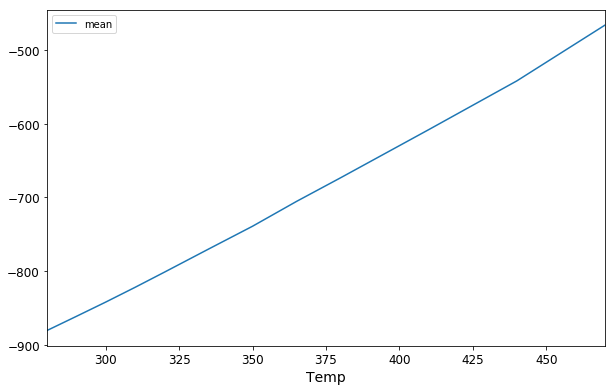

In [96]:
ttt= tt.groupby("Temp")["TotalE"].describe().reset_index()
lm_original = np.polyfit(ttt.Temp, ttt["mean"], 1)
print(lm_original)
tt.groupby("Temp")["TotalE"].describe().reset_index().plot("Temp", "mean")

In [134]:
data = pd.read_feather("/Users/weilu/Research/server/mar_2018/05_week/unfold/29_Mar_230845.feather")

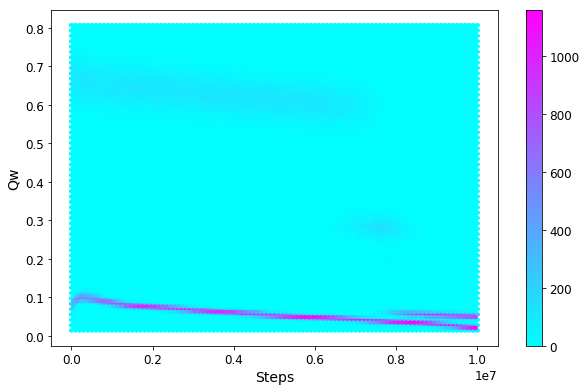

In [135]:
data.query("Steps < 1e7").plot.hexbin("Steps", "Qw", cmap="cool", sharex=False)

In [2]:
data = pd.read_feather("/Users/weilu/Research/server/mar_2018/05_week/unfold/28_Mar_163824.feather")

In [27]:
69.7*0.35

24.395

In [29]:
1/69.7*2

0.028694404591104734

In [9]:
data.columnsumns

Index(['Steps', 'Qw', 'Energy', 'Run', 'DisReal', 'z_average', 'abs_z_average',
       'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5', 'z_h6', 'Distance', 'AMH-Go',
       'Membrane', 'Rg', 'rg1', 'rg2', 'rg3', 'rg4', 'rg5', 'rg6', 'rg_all',
       'Lipid', 'Lipid1', 'Lipid2', 'Lipid3', 'Lipid4', 'Lipid5', 'Lipid6',
       'Lipid7', 'Lipid8', 'Lipid9', 'Lipid10', 'Lipid11', 'Lipid12',
       'Lipid13', 'Lipid14', 'Lipid15', 'TotalE', 'Folder'],
      dtype='object')

## 0.35 force unit is about the place where it unfold.

### the Distance increases as force increases. From around 34 to 50

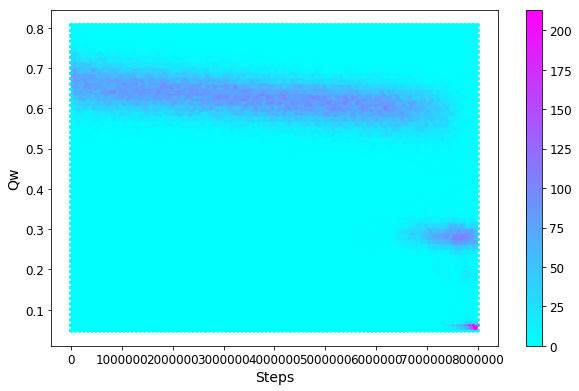

In [22]:
data.query("Steps < 0.8e7").plot.hexbin("Steps", "Qw", cmap="cool", sharex=False)

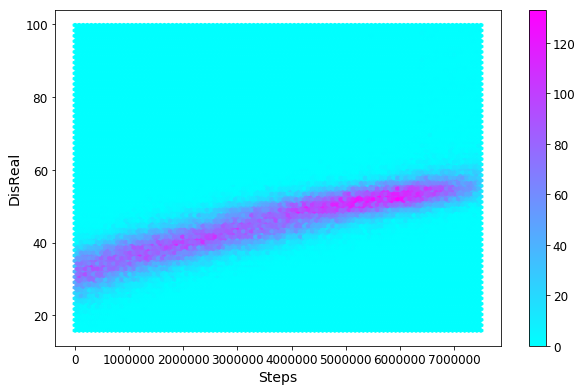

In [17]:
data.query("Steps < 0.75e7").query("DisReal < 100").plot.hexbin("Steps", "DisReal", cmap="cool", sharex=False)

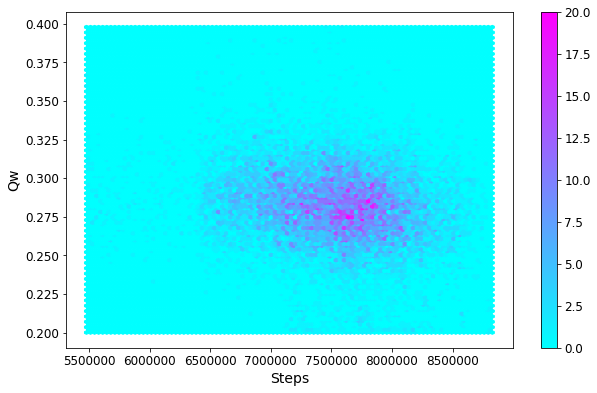

In [25]:
data.query("Qw < 0.4 and Qw > 0.2").plot.hexbin("Steps", "Qw", cmap="cool", sharex=False)

In [26]:
data.query("Qw < 0.4 and Qw > 0.2").mean()

Steps            7.515164e+06
Qw               2.815010e-01
Energy          -7.972593e+02
Run                       inf
DisReal          1.660540e+02
z_average       -9.232891e+00
abs_z_average    1.185993e+01
z_h1            -1.933514e+01
z_h2            -1.036519e+01
z_h3            -4.331215e+00
z_h4            -1.065632e+01
z_h5            -4.844121e+00
z_h6            -4.834371e+00
Distance         1.657364e+02
AMH-Go          -4.097450e+02
Membrane        -3.179659e+01
Rg               1.563998e+01
rg1              1.256990e+00
rg2              5.326775e+00
rg3              1.548448e+00
rg4              2.370826e+00
rg5              1.441439e+00
rg6              3.695505e+00
rg_all           1.563998e+01
Lipid           -1.726516e+01
Lipid1           3.361988e-04
Lipid2          -1.861182e-05
Lipid3          -1.742701e-05
Lipid4          -3.912820e-06
Lipid5          -1.859926e-05
Lipid6          -4.302988e-01
Lipid7          -2.197791e+00
Lipid8          -1.599250e+00
Lipid9    